In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,chi2,f_regression,r_regression,mutual_info_regression, f_classif

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,LeaveOneOut,ShuffleSplit,StratifiedKFold,GroupKFold
from sklearn.tree import DecisionTreeRegressor,plot_tree

from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
absence=['na','-','I']
df=pd.read_excel('basedonnees.xlsx',na_values=absence,parse_dates=True,index_col=[0])

In [3]:
df=df.dropna(axis=0)

df=df.drop([df.columns[1],df.columns[2]],axis=1)
df.head()

,W2- Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,
2021-01-01 00:05:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:10:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:15:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:20:00,0.0,21.9667,1.7416,25.9,0.0
2021-01-01 00:25:00,0.0,21.9667,1.7416,25.9,0.0


In [4]:
df.shape

(104238, 5)

In [5]:
null_suprim=df[df['W2- Irradiance (W/m²)']>0]

In [6]:
null_suprim

,W2- Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
Date (+00:00),,,,,
2021-01-01 07:25:00,0.4000,19.6500,1.6900,24.60,0.0
2021-01-01 07:30:00,3.2500,19.6480,1.9283,24.60,2400.0
2021-01-01 07:35:00,8.2467,19.6217,1.9417,24.75,15600.0
2021-01-01 07:40:00,17.6000,19.7050,2.2800,24.80,26400.0
2021-01-01 07:45:00,31.9500,19.8833,2.3016,25.05,132000.0
...,...,...,...,...,...
2021-12-30 18:15:00,63.5600,33.3920,1.6440,32.55,2599200.0
2021-12-30 18:20:00,37.2100,33.1600,0.9590,31.75,2898000.0
2021-12-30 18:25:00,16.2400,32.8000,1.1720,31.30,2558400.0


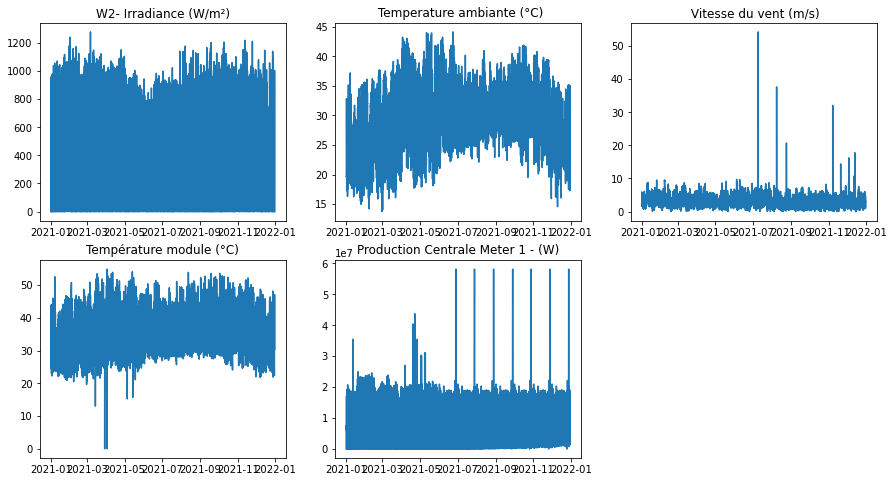

In [7]:
fig=plt.figure(figsize=(15,8))
for i,j in enumerate(null_suprim.columns):
    
    ax=fig.add_subplot(2,3,1+i)
    ax.plot(null_suprim[j])
    ax.set_title(j)


plt.savefig('donnee_parametres.png')

In [8]:
XX=null_suprim.drop([null_suprim.columns[4],null_suprim.columns[2]],axis=1)
yy=null_suprim[['Production Centrale Meter 1 - (W)']]

XX=np.array(XX)
yy=np.array(yy)
seuil=12 # POUR 1H
Xs_train=XX[12:]
ys_train=yy[12:]

Xs_teste=XX[:12]
ys_teste=yy[:12]

print(Xs_train.shape)
print(Xs_teste.shape)
print("______________________________")
print(ys_train.shape)
print(ys_teste.shape)

(52862, 3)
(12, 3)
______________________________
(52862, 1)
(12, 1)


In [9]:
ys_train

array([[1940400.],
       [1562400.],
       [3649200.],
       ...,
       [2558400.],
       [1536000.],
       [1482000.]])

In [10]:
XX

array([[ 0.4   , 19.65  , 24.6   ],
       [ 3.25  , 19.648 , 24.6   ],
       [ 8.2467, 19.6217, 24.75  ],
       ...,
       [16.24  , 32.8   , 31.3   ],
       [ 5.78  , 32.46  , 30.85  ],
       [ 0.2   , 32.3   , 30.3   ]])

### KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

params={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsRegressor(),params,cv=10)
grid.fit(Xs_train,ys_train)
modele4=grid.best_estimator_
print(f"score sur le train set:{modele4.score(Xs_train,ys_train)}")
print(f"score sur le teste set:{modele4.score(Xs_teste,ys_teste)}")
print(f"MSE_train:{np.sqrt(mean_squared_error(ys_train,modele4.predict(Xs_train)))}")
print(f"MSE_train:{np.sqrt(mean_squared_error(ys_teste,modele4.predict(Xs_teste)))}")

score sur le train set:0.7415468064387796
score sur le teste set:-4.409825834968251
MSE_train:2941004.496717522
MSE_train:1162886.766971653


In [12]:
grid.best_score_

0.6627984052245884

### regression lineaire

In [13]:
modele_1=LinearRegression()
modele_1.fit(Xs_train,ys_train)
trat=KFold(10)#,shuffle=False, random_state=1)
#print(cross_val_score(modele_1,X_train,y_train,cv=trat).mean())

print(f"R2_train:{modele_1.score(Xs_train,ys_train)}")
print(f"R2_teste:{modele_1.score(Xs_teste,ys_teste)}")
print(f"MSE_TRAIN:{np.sqrt(mean_squared_error(ys_train,modele_1.predict(Xs_train)))}")
print(f"MSE_TESTE:{np.sqrt(mean_squared_error(ys_teste,modele_1.predict(Xs_teste)))}")

R2_train:0.6939048554987048
R2_teste:-17.46454600621507
MSE_TRAIN:3200611.4707181547
MSE_TESTE:2148399.8021809426


### LES ARBRE DE DECISIONS

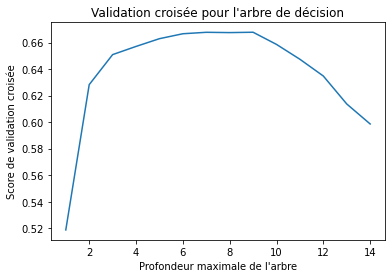

La meilleure profondeur maximale est : 9


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1080x360 with 0 Axes>

In [14]:
# Liste des profondeurs maximales à tester
max_depths = range(1, 15)
# Liste pour stocker les scores de validation croisée
cv_scores = []
# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, Xs_train, ys_train, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal

plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
tree.fit(Xs_train, ys_train)

plt.figure(figsize=(15,5))
plot_tree(tree, feature_names=XX.columns)
plt.show()

print(r2_score(ys_train, tree.predict(Xs_train)))
print(r2_score(ys_teste, tree.predict(Xs_teste)))

### BAGGING

In [ ]:
from sklearn.ensemble import BaggingRegressor
# Création du modèle
model = BaggingRegressor(base_estimator=modele4,random_state=42)
# Définition de la grille de paramètres pour la recherche
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500],
    #'learning_rate': [0.01, 0.1,0.5,0.6,0.7,0.8, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid_search.fit(Xs_train, ys_train)
# Affichage des meilleurs paramètres
print("Best Parameters: ", grid_search.best_params_)
# Prédiction et évaluation du modèle
best_model = grid_search.best_estimator_
# Sur l'ensemble d'entrainement
print("R2_Train:", r2_score(ys_train, best_model.predict(Xs_train)))
# Sur l'ensemble de test
print("R2_Test:", r2_score(ys_teste,  best_model.predict(Xs_teste)))

Best Parameters:  {'n_estimators': 500}
R2_Train: 0.7418190049553269
R2_Test: -4.488909390297772


## nomrmalisation des donnees

In [20]:
nor=MinMaxScaler()
XX_norm=nor.fit_transform(XX)
yy_norm=nor.fit_transform(yy)
hori=12
Xs_train_norm=XX_norm[hori:]
ys_train_norm=yy_norm[hori:]

Xs_teste_norm=XX_norm[:hori]
ys_teste_norm=yy_norm[:hori]

print(f'min yy:{np.min(yy_norm)} max yy: {np.max(yy_norm)}')

print(Xs_train_norm.shape)
print(Xs_teste_norm.shape)
print("______________________________")
print(ys_train_norm.shape)
print(ys_teste_norm.shape)

min yy:0.0 max yy: 1.0
(52862, 3)
(12, 3)
______________________________
(52862, 1)
(12, 1)


### KNN AVEC NORMALISATION

In [ ]:
params={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsRegressor(),params,cv=10)
grid.fit(Xs_train_norm,ys_train_norm)
modele4=grid.best_estimator_
print(f"score sur le train set:{modele4.score(Xs_train_norm,ys_train_norm)}")
print(f"score sur le teste set:{modele4.score(Xs_teste_norm,ys_teste_norm)}")
print(f"MSE_train:{np.sqrt(mean_squared_error(ys_train_norm,modele4.predict(Xs_train_norm)))}")
print(f"MSE_tEST:{np.sqrt(mean_squared_error(ys_teste_norm,modele4.predict(Xs_teste_norm)))}")

score sur le train set:0.7577802247988332
score sur le teste set:-2.331473129872363
MSE_train:0.04893918359158031
MSE_tEST:0.015685960924248378


### Les arbres de decisions avec normalisation

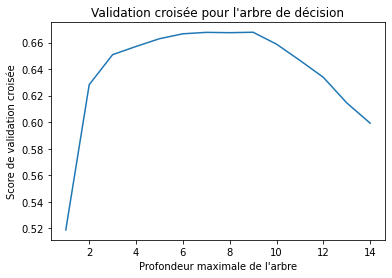

La meilleure profondeur maximale est : 9


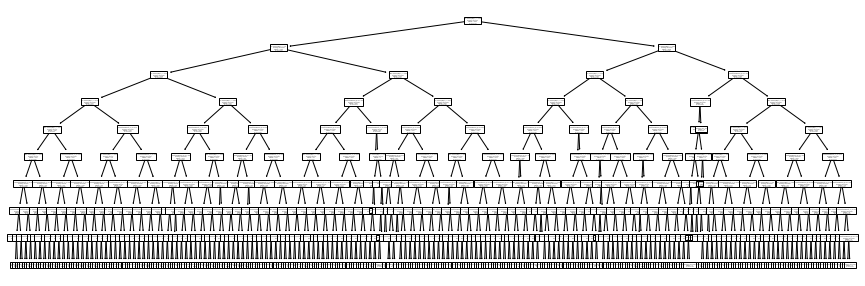

0.742522897715642
-8.9420449923951


In [ ]:
# Liste des profondeurs maximales à tester
max_depths = range(1, 15)
# Liste pour stocker les scores de validation croisée
cv_scores = []
# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, Xs_train_norm, ys_train_norm, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal

plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)
# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
tree.fit(Xs_train_norm, ys_train_norm)

plt.figure(figsize=(15,5))
plot_tree(tree, feature_names=null_suprim.drop([null_suprim.columns[4],null_suprim.columns[2]],axis=1).columns)
plt.show()

print(r2_score(ys_train_norm, tree.predict(Xs_train_norm)))
print(r2_score(ys_teste_norm, tree.predict(Xs_teste_norm)))

### Bagging avec normalisation

In [ ]:
from sklearn.ensemble import BaggingRegressor
# Création du modèle
model = BaggingRegressor(random_state=42)
# Définition de la grille de paramètres pour la recherche
param_grid = {
    'n_estimators': [50, 100, 200,300,400,500],
    #'learning_rate': [0.01, 0.1,0.5,0.6,0.7,0.8, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid_search.fit(Xs_train_norm, ys_train_norm)
# Affichage des meilleurs paramètres
print("Best Parameters: ", grid_search.best_params_)
# Prédiction et évaluation du modèle
best_model = grid_search.best_estimator_
# Sur l'ensemble d'entrainement
print("R2_Train:", r2_score(ys_train_norm, best_model.predict(Xs_train_norm)))
# Sur l'ensemble de test
print("R2_Test:", r2_score(ys_teste_norm,best_model.predict(Xs_teste_norm)))

Best Parameters:  {'n_estimators': 500}
R2_Train: 0.9612599682243671
R2_Test: -4.370225687681973


In [43]:
import tensorflow as tf

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=32,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model.add(tf.keras.layers.Dense(units=32,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model.add(tf.keras.layers.Dense(units=32,activation='relu',
                                kernel_initializer='uniform',
                                input_dim=3))
model.add(tf.keras.layers.Dense(units=1,activation='relu'))

model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [44]:
model.fit(Xs_train_norm,ys_train_norm,epochs=50)

Epoch 1/50


1652/1652 [==============================] - 8s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 2/50
1652/1652 [==============================] - 5s 3ms/step - loss: 0.0030 - mse: 0.0030
Epoch 3/50
1652/1652 [==============================] - 4s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 4/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 5/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 6/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 7/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 8/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 0.0029
Epoch 9/50
1652/1652 [==============================] - 3s 2ms/step - loss: 0.0029 - mse: 0.0029
Epoch 10/50
1652/1652 [==============================] - 4s 2ms/step - loss: 0.0029 - mse: 0.0029
Epoch 11/50
1652/1652 [=================

In [45]:
model.evaluate(Xs_teste_norm,ys_teste_norm)

1/1 [==============================] - 0s 177ms/step - loss: 4.1535e-04 - mse: 4.1535e-04


[0.00041535322088748217, 0.00041535322088748217]

In [46]:
print(f'testR2:{r2_score(ys_teste_norm,model.predict(Xs_teste_norm))}')
print(f'trainR2:{r2_score(ys_train_norm,model.predict(Xs_train_norm))}')

1/1 [==============================] - 0s 140ms/step
testR2:-4.623822941478381
1652/1652 [==============================] - 3s 2ms/step
trainR2:0.7285495317572307


1652/1652 [==============================] - 3s 2ms/step


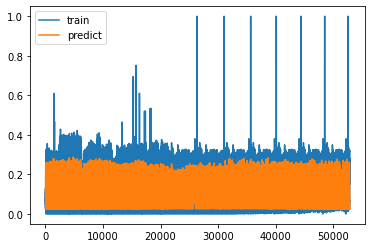

In [30]:
plt.plot(ys_train_norm,label='train')
plt.plot(model.predict(Xs_train_norm),label='predict')
plt.legend()

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Créer un modèle de forêt aléatoire de régression
model = RandomForestRegressor(random_state=42)

# Recherche aléatoire pour optimiser les paramètres
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='r2', n_iter=10, cv=5)
random_search.fit(Xs_train_norm, ys_train_norm)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", random_search.best_params_)

Meilleurs paramètres :  {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}


In [ ]:
r2_score(ys_train_norm,random_search.predict(Xs_train_norm))

0.7628816692499769

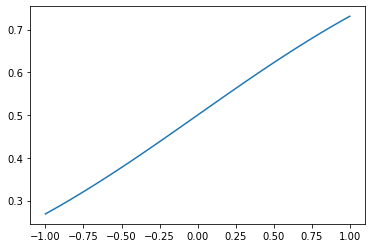

In [ ]:
x = np.linspace(-1,1,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)